In [220]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
url = "data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]
df['mkt_cap'] /= df['mkt_cap'].max()
df['tran_value'] /= df['tran_value'].max()
df['prev_tran_num'] /= df['prev_tran_num'].max()
df['return_t5'] = np.log(1 + df['return_t5'])
df['return_t30'] = np.log(1 + df['return_t30'])
df['vol_sh_out_pct'] = np.log(1 + df['vol_sh_out_pct'])
df['tran_value'] = np.log(1 + df['tran_value'])
df['mkt_cap'] = np.log(1 + df['mkt_cap'])

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [210]:
y_train_5d

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [211]:
X_train

array([[-1.        , -0.0661398 , -0.08338161, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -0.14156356, -0.14618251, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.17793121, -0.23445731, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.        , -0.14041215, -0.02224561, ...,  0.333     ,
         0.        ,  0.        ],
       [ 1.        , -0.11878354, -0.08883121, ...,  0.522     ,
         0.761     ,  0.935     ],
       [ 1.        , -0.08664781, -0.04919024, ...,  0.534     ,
         0.46      ,  0.548     ]])

In [212]:
X_train.shape

(34481, 11)

In [213]:
X_test.shape

(17240, 11)

In [214]:
# create model
model = Sequential()
# model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [215]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [216]:
# Fit the model
history = model.fit(
    X_train, y_train_5d, epochs=1000, batch_size=256,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.7128 - acc: 0.4650 - val_loss: 0.7041 - val_acc: 0.4846
Epoch 2/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.7057 - acc: 0.4798 - val_loss: 0.7000 - val_acc: 0.5001
Epoch 3/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.7025 - acc: 0.4916 - val_loss: 0.6980 - val_acc: 0.5031
Epoch 4/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.7006 - acc: 0.5059 - val_loss: 0.6969 - val_acc: 0.5108
Epoch 5/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6992 - acc: 0.5140 - val_loss: 0.6961 - val_acc: 0.5157
Epoch 6/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6980 - acc: 0.5204 - val_loss: 0.6954 - val_acc: 0.5196
Epoch 7/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6970 - acc: 0.5241 - val_loss: 0.6949 - 

27584/27584 [==============================] - 0s 5us/step - loss: 0.6850 - acc: 0.5457 - val_loss: 0.6902 - val_acc: 0.5478
Epoch 60/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6849 - acc: 0.5470 - val_loss: 0.6903 - val_acc: 0.5473
Epoch 61/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6849 - acc: 0.5464 - val_loss: 0.6902 - val_acc: 0.5466
Epoch 62/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6849 - acc: 0.5459 - val_loss: 0.6902 - val_acc: 0.5463
Epoch 63/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6848 - acc: 0.5467 - val_loss: 0.6902 - val_acc: 0.5462
Epoch 64/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6848 - acc: 0.5469 - val_loss: 0.6902 - val_acc: 0.5462
Epoch 65/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6848 - acc: 0.5467 - val_loss: 0.6902 - val_acc: 0.5463
Epoch 66/1000
27584/27584 [==============

Epoch 118/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6837 - acc: 0.5509 - val_loss: 0.6902 - val_acc: 0.5444
Epoch 119/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6837 - acc: 0.5497 - val_loss: 0.6902 - val_acc: 0.5452
Epoch 120/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6837 - acc: 0.5494 - val_loss: 0.6902 - val_acc: 0.5457
Epoch 121/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6837 - acc: 0.5503 - val_loss: 0.6902 - val_acc: 0.5446
Epoch 122/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6837 - acc: 0.5493 - val_loss: 0.6902 - val_acc: 0.5465
Epoch 123/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6836 - acc: 0.5502 - val_loss: 0.6902 - val_acc: 0.5449
Epoch 124/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6836 - acc: 0.5502 - val_loss: 0.6902 - val_acc: 0.5456
Epoch 125/1000
27584

27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5549 - val_loss: 0.6902 - val_acc: 0.5431
Epoch 177/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5556 - val_loss: 0.6902 - val_acc: 0.5420
Epoch 178/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5554 - val_loss: 0.6902 - val_acc: 0.5418
Epoch 179/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5557 - val_loss: 0.6902 - val_acc: 0.5423
Epoch 180/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5545 - val_loss: 0.6902 - val_acc: 0.5426
Epoch 181/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5547 - val_loss: 0.6902 - val_acc: 0.5431
Epoch 182/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6833 - acc: 0.5555 - val_loss: 0.6902 - val_acc: 0.5420
Epoch 183/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6832 - acc: 0.5569 - val_loss: 0.6902 - val_acc: 0.5365
Epoch 235/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6832 - acc: 0.5558 - val_loss: 0.6903 - val_acc: 0.5359
Epoch 236/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6832 - acc: 0.5565 - val_loss: 0.6903 - val_acc: 0.5360
Epoch 237/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5559 - val_loss: 0.6902 - val_acc: 0.5366
Epoch 238/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5568 - val_loss: 0.6903 - val_acc: 0.5353
Epoch 239/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5547 - val_loss: 0.6902 - val_acc: 0.5369
Epoch 240/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5558 - val_loss: 0.6902 - val_acc: 0.5373
Epoch 241/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5553 - val_loss: 0.6903 - val_acc: 0.5369
Epoch 293/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5551 - val_loss: 0.6903 - val_acc: 0.5372
Epoch 294/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5553 - val_loss: 0.6903 - val_acc: 0.5372
Epoch 295/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5556 - val_loss: 0.6903 - val_acc: 0.5373
Epoch 296/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5553 - val_loss: 0.6903 - val_acc: 0.5384
Epoch 297/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5556 - val_loss: 0.6903 - val_acc: 0.5381
Epoch 298/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6831 - acc: 0.5556 - val_loss: 0.6903 - val_acc: 0.5376
Epoch 299/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5554 - val_loss: 0.6904 - val_acc: 0.5388
Epoch 351/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5560 - val_loss: 0.6904 - val_acc: 0.5363
Epoch 352/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5562 - val_loss: 0.6904 - val_acc: 0.5347
Epoch 353/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5544 - val_loss: 0.6904 - val_acc: 0.5365
Epoch 354/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5552 - val_loss: 0.6904 - val_acc: 0.5368
Epoch 355/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6904 - val_acc: 0.5381
Epoch 356/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5562 - val_loss: 0.6904 - val_acc: 0.5347
Epoch 357/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5552 - val_loss: 0.6905 - val_acc: 0.5340
Epoch 409/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6905 - val_acc: 0.5349
Epoch 410/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5557 - val_loss: 0.6905 - val_acc: 0.5339
Epoch 411/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5548 - val_loss: 0.6905 - val_acc: 0.5346
Epoch 412/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5552 - val_loss: 0.6905 - val_acc: 0.5343
Epoch 413/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6830 - acc: 0.5553 - val_loss: 0.6905 - val_acc: 0.5341
Epoch 414/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6830 - acc: 0.5552 - val_loss: 0.6905 - val_acc: 0.5344
Epoch 415/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5546 - val_loss: 0.6906 - val_acc: 0.5344
Epoch 467/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5549 - val_loss: 0.6906 - val_acc: 0.5346
Epoch 468/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5542 - val_loss: 0.6906 - val_acc: 0.5344
Epoch 469/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6906 - val_acc: 0.5337
Epoch 470/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5551 - val_loss: 0.6906 - val_acc: 0.5343
Epoch 471/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6906 - val_acc: 0.5336
Epoch 472/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5548 - val_loss: 0.6906 - val_acc: 0.5346
Epoch 473/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5543 - val_loss: 0.6906 - val_acc: 0.5337
Epoch 525/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6906 - val_acc: 0.5339
Epoch 526/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5550 - val_loss: 0.6907 - val_acc: 0.5349
Epoch 527/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5543 - val_loss: 0.6906 - val_acc: 0.5337
Epoch 528/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6907 - val_acc: 0.5346
Epoch 529/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5549 - val_loss: 0.6907 - val_acc: 0.5349
Epoch 530/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6907 - val_acc: 0.5346
Epoch 531/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5539 - val_loss: 0.6907 - val_acc: 0.5343
Epoch 583/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5543 - val_loss: 0.6907 - val_acc: 0.5343
Epoch 584/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5554 - val_loss: 0.6908 - val_acc: 0.5352
Epoch 585/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5546 - val_loss: 0.6908 - val_acc: 0.5352
Epoch 586/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5537 - val_loss: 0.6907 - val_acc: 0.5346
Epoch 587/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5543 - val_loss: 0.6907 - val_acc: 0.5346
Epoch 588/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5547 - val_loss: 0.6907 - val_acc: 0.5346
Epoch 589/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5532 - val_loss: 0.6908 - val_acc: 0.5352
Epoch 641/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5544 - val_loss: 0.6908 - val_acc: 0.5346
Epoch 642/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5543 - val_loss: 0.6908 - val_acc: 0.5344
Epoch 643/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5545 - val_loss: 0.6908 - val_acc: 0.5347
Epoch 644/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5538 - val_loss: 0.6908 - val_acc: 0.5347
Epoch 645/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5541 - val_loss: 0.6908 - val_acc: 0.5347
Epoch 646/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5545 - val_loss: 0.6908 - val_acc: 0.5347
Epoch 647/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5529 - val_loss: 0.6909 - val_acc: 0.5346
Epoch 699/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5529 - val_loss: 0.6909 - val_acc: 0.5347
Epoch 700/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5533 - val_loss: 0.6909 - val_acc: 0.5347
Epoch 701/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5531 - val_loss: 0.6909 - val_acc: 0.5347
Epoch 702/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5533 - val_loss: 0.6909 - val_acc: 0.5347
Epoch 703/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5530 - val_loss: 0.6909 - val_acc: 0.5347
Epoch 704/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5534 - val_loss: 0.6909 - val_acc: 0.5344
Epoch 705/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6829 - acc: 0.5537 - val_loss: 0.6909 - val_acc: 0.5355
Epoch 757/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5526 - val_loss: 0.6909 - val_acc: 0.5353
Epoch 758/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6829 - acc: 0.5550 - val_loss: 0.6909 - val_acc: 0.5347
Epoch 759/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5528 - val_loss: 0.6909 - val_acc: 0.5350
Epoch 760/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5524 - val_loss: 0.6909 - val_acc: 0.5353
Epoch 761/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5531 - val_loss: 0.6909 - val_acc: 0.5353
Epoch 762/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5537 - val_loss: 0.6909 - val_acc: 0.5353
Epoch 763/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5530 - val_loss: 0.6909 - val_acc: 0.5353
Epoch 815/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5537 - val_loss: 0.6910 - val_acc: 0.5350
Epoch 816/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5535 - val_loss: 0.6910 - val_acc: 0.5350
Epoch 817/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5533 - val_loss: 0.6909 - val_acc: 0.5350
Epoch 818/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5526 - val_loss: 0.6909 - val_acc: 0.5352
Epoch 819/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5529 - val_loss: 0.6909 - val_acc: 0.5352
Epoch 820/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5539 - val_loss: 0.6910 - val_acc: 0.5350
Epoch 821/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5536 - val_loss: 0.6910 - val_acc: 0.5346
Epoch 873/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5532 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 874/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5531 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 875/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5534 - val_loss: 0.6911 - val_acc: 0.5346
Epoch 876/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5531 - val_loss: 0.6911 - val_acc: 0.5349
Epoch 877/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6829 - acc: 0.5534 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 878/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5530 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 879/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5540 - val_loss: 0.6911 - val_acc: 0.5355
Epoch 931/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5526 - val_loss: 0.6911 - val_acc: 0.5352
Epoch 932/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5528 - val_loss: 0.6911 - val_acc: 0.5344
Epoch 933/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5524 - val_loss: 0.6910 - val_acc: 0.5346
Epoch 934/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5529 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 935/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5538 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 936/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5529 - val_loss: 0.6910 - val_acc: 0.5347
Epoch 937/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5527 - val_loss: 0.6911 - val_acc: 0.5344
Epoch 989/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5543 - val_loss: 0.6911 - val_acc: 0.5343
Epoch 990/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5529 - val_loss: 0.6911 - val_acc: 0.5344
Epoch 991/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5528 - val_loss: 0.6911 - val_acc: 0.5347
Epoch 992/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5540 - val_loss: 0.6911 - val_acc: 0.5350
Epoch 993/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5531 - val_loss: 0.6911 - val_acc: 0.5341
Epoch 994/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6829 - acc: 0.5530 - val_loss: 0.6911 - val_acc: 0.5349
Epoch 995/1000
27584/27584 [=======

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002561AE5FDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002561C3EF160>]], dtype=object)

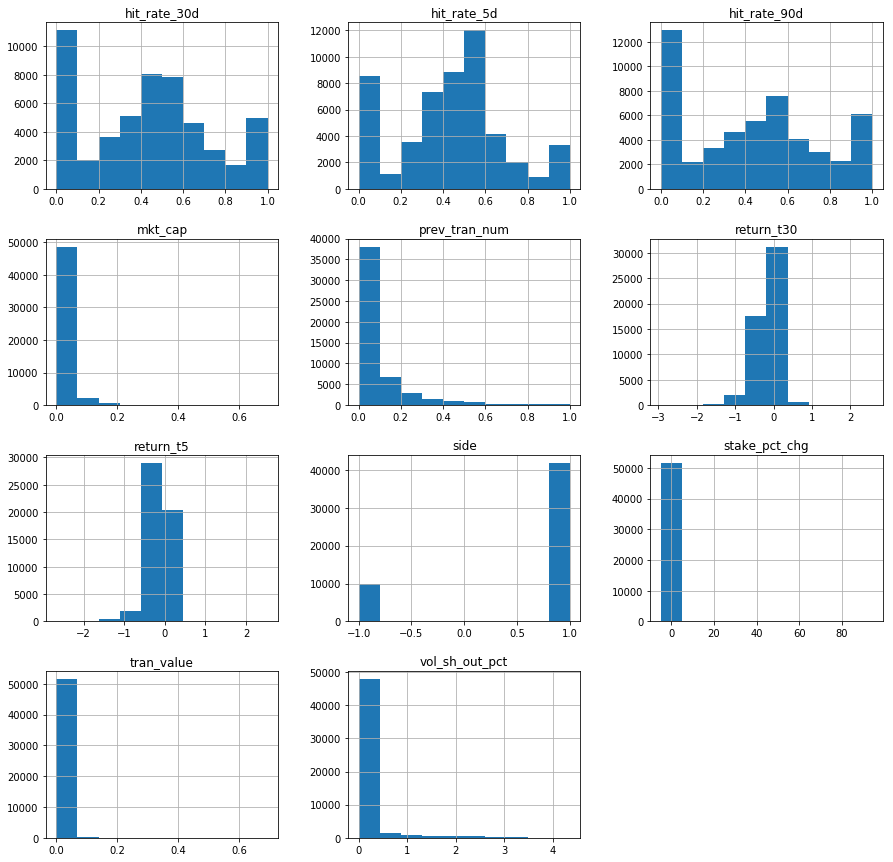

In [219]:
df[col_list].hist(figsize = [15,15])

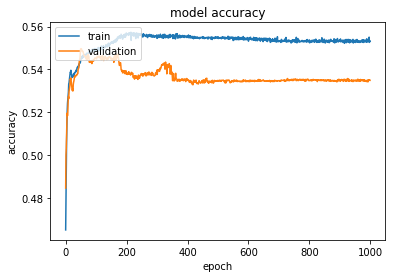

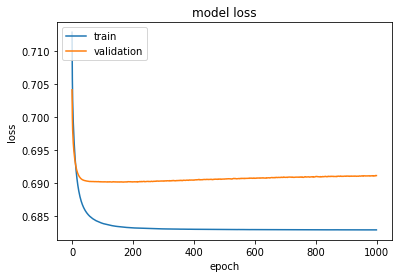

In [221]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [222]:
# evaluate the model
scores = model.evaluate(X_train, y_train_5d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_5d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 16us/step
[Train] acc: 54.93%
17240/17240 [==============================] - 0s 16us/step
[Test] acc: 54.14%
